### ECE 572 Course Project - Cool Fancy-Dancy Name Here

Project Description:
Python-based program designed to extract and visualize network traffic information from a Wireshark generated .csv file. 

Team Members:

Devang Sharma - V00931210 - devsharma@uvic.ca

Alex Spurgeon - V00818626 - aespurge@uvic.ca

Aditya Naren Yerramilli - V00938179 - naren1@uvic.ca


#### Useful Resources for this project:

General References:

Pandas: https://nbviewer.jupyter.org/gist/manujeevanprakash/996d18985be612072ee0
https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html

Mix of everything: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

Examples of analysis:
https://null-byte.wonderhowto.com/how-to/analyze-wi-fi-data-captures-with-jupyter-notebook-0201490/

https://github.com/skickar/Research/blob/master/RedLineResearch.ipynb

https://medium.com/hackervalleystudio/learning-packet-analysis-with-data-science-5356a3340d4e

https://github.com/secdevopsai/Packet-Analytics/blob/master/Packet-Analytics.ipynb

(Some minor examples here) https://www.python4networkengineers.com/posts/wireshark/analyzing_wireshark_data_with_pandas/

In [1]:
# Imports and essentials
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import datetime
import re
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

# 1) ECE572Benign

In [2]:
# Import data from csv files - ECE572Benign.csv, ECE572Test.csv, & ECE572DoS.csv
benign_df = pd.read_csv('ECE572Benign_n.csv', 
                 delimiter = ',', encoding='latin-1', header=0) # Header labels all in row = 0 

## Cleanup

In [3]:
benign_df = benign_df.fillna(0)

benign_df = benign_df.drop(columns="No.")

#print(benign_df.head())

print(benign_df[["Source", "Source Port", 
               "Destination", "Dest Port", "Protocol"]].head(10)) #print only required data

print("\nDataset dimensions", benign_df.shape)

              Source  Source Port        Destination  Dest Port Protocol
0     192.168.56.104         68.0     192.168.56.100       67.0     DHCP
1     192.168.56.100         67.0     192.168.56.104       68.0     DHCP
2  PcsCompu_6c:9b:66          0.0  PcsCompu_b7:12:b1        0.0      ARP
3  PcsCompu_b7:12:b1          0.0  PcsCompu_6c:9b:66        0.0      ARP
4  PcsCompu_74:73:8a          0.0          Broadcast        0.0      ARP
5  PcsCompu_6c:9b:66          0.0  PcsCompu_74:73:8a        0.0      ARP
6     192.168.56.105      46730.0     192.168.56.104       80.0      TCP
7     192.168.56.104         80.0     192.168.56.105    46730.0      TCP
8     192.168.56.105      46730.0     192.168.56.104       80.0      TCP
9     192.168.56.105      46730.0     192.168.56.104       80.0     HTTP

Dataset dimensions (968, 8)


## Network Graph

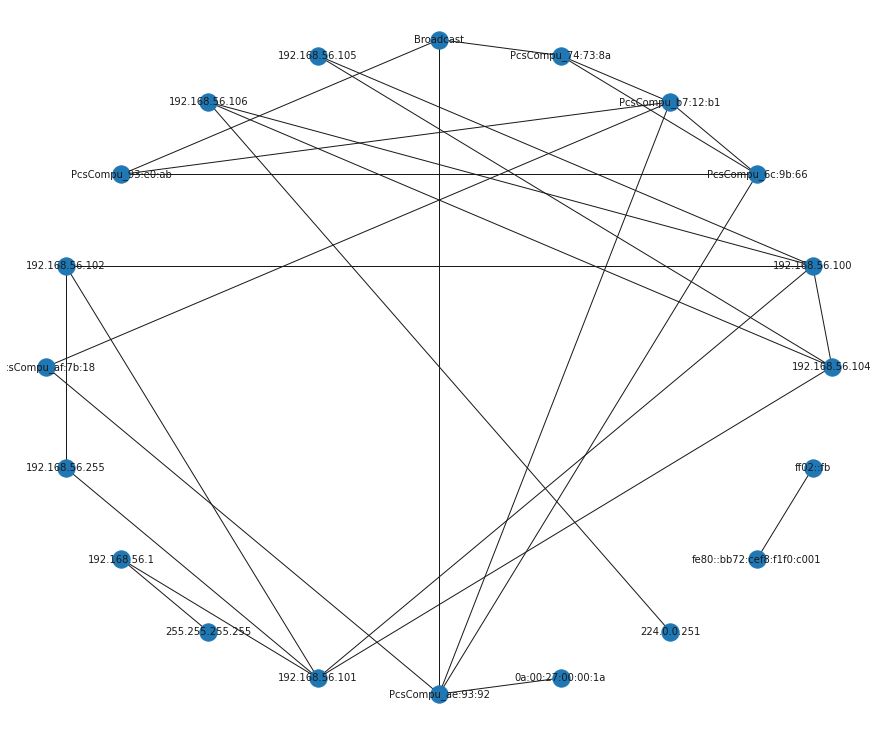

In [4]:
#https://towardsdatascience.com/from-dataframe-to-network-graph-bbb35c8ab675
import networkx as nx
network_graph = nx.from_pandas_edgelist(benign_df, 'Source', 'Destination')
from matplotlib.pyplot import figure
figure(figsize=(12, 10))
nx.draw_shell(network_graph, with_labels=True, font_size=10)

## Statistics

In [5]:
def df_to_num(unique_df=None):
    num_unique_df = pd.Series([])
    i = -1
    for val in unique_df:
        if not (re.search('[a-zA-Z]', val)):
            i+=1
            num_unique_df.loc[i] = val
    return num_unique_df

### Top level view of the Benign PCap

In [6]:
# Source Adddress with the highest amount of data transfer
print("# Source Address with the highest amount of data transfer")
print(benign_df['Source'].describe(),'\n\n')

# Destination Address with the highest amount of data transfer
print("# Destination with the highest amount of data transfer")
print(benign_df['Destination'].describe(),'\n\n')

frequent_address = benign_df['Source'].describe()['top']

# Destination address to which most of the connections/data transfers are made
print("# Destination address receiving most amount of data")
print(benign_df[benign_df['Source'] == frequent_address]['Destination'].unique(),"\n\n")

# Most frequently used destination port by top source address (dst ports)
print("# Most frequently used Destination ports by top source address (Destination Ports)")
print((benign_df[benign_df['Source'] == frequent_address]['Dest Port'].unique()),"\n\n")

# Most frequently used source port by top source address(src ports)
print("# Most frequently used source ports by top source address (Source ports)")
print(benign_df[benign_df['Source'] == frequent_address]['Source Port'].unique(),"\n\n")

# Source Address with the highest amount of data transfer
count                968
unique                15
top       192.168.56.104
freq                 343
Name: Source, dtype: object 


# Destination with the highest amount of data transfer
count                968
unique                19
top       192.168.56.104
freq                 343
Name: Destination, dtype: object 


# Destination address receiving most amount of data
['192.168.56.100' '192.168.56.105' '192.168.56.106' '192.168.56.101'] 


# Most frequently used Destination ports by top source address (Destination Ports)
[   67. 46730. 46736. 46738. 46740. 46742. 46744. 46746. 46748. 40624.
 40626. 40628. 40634. 40636. 40650. 40652. 40690. 40692.     0.   445.
   139.] 


# Most frequently used source ports by top source address (Source ports)
[   68.    80.     0. 48644. 56194. 48648.] 




### Deep analysis of Source Stats

In [7]:
# Unique Source Addresses
print("Unique Source Addresses")
src_unique_df = benign_df['Source'].unique()
print(src_unique_df)
print('\nUnique IPv4 Source Addresses\n'+str(df_to_num(src_unique_df)))

Unique Source Addresses
['192.168.56.104' '192.168.56.100' 'PcsCompu_6c:9b:66' 'PcsCompu_b7:12:b1'
 'PcsCompu_74:73:8a' '192.168.56.105' '192.168.56.106' 'PcsCompu_93:e0:ab'
 '192.168.56.102' 'PcsCompu_af:7b:18' '192.168.56.1' '192.168.56.101'
 'PcsCompu_ae:93:92' '0a:00:27:00:00:1a' 'fe80::bb72:cef8:f1f0:c001']

Unique IPv4 Source Addresses
0    192.168.56.104
1    192.168.56.100
2    192.168.56.105
3    192.168.56.106
4    192.168.56.102
5      192.168.56.1
6    192.168.56.101
dtype: object


/home/devang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Total data transmitted by Source:
Source
0a:00:27:00:00:1a               120
192.168.56.1                    458
192.168.56.100                 5900
192.168.56.101                23530
192.168.56.102                13125
192.168.56.104               598728
192.168.56.105                17834
192.168.56.106                26074
PcsCompu_6c:9b:66               480
PcsCompu_74:73:8a               126
PcsCompu_93:e0:ab               300
PcsCompu_ae:93:92               420
PcsCompu_af:7b:18               180
PcsCompu_b7:12:b1               600
fe80::bb72:cef8:f1f0:c001       107
Name: Length, dtype: int64
<class 'pandas.core.series.Series'>


<AxesSubplot:title={'center':'Addresses Sending Payloads'}, ylabel='Source'>

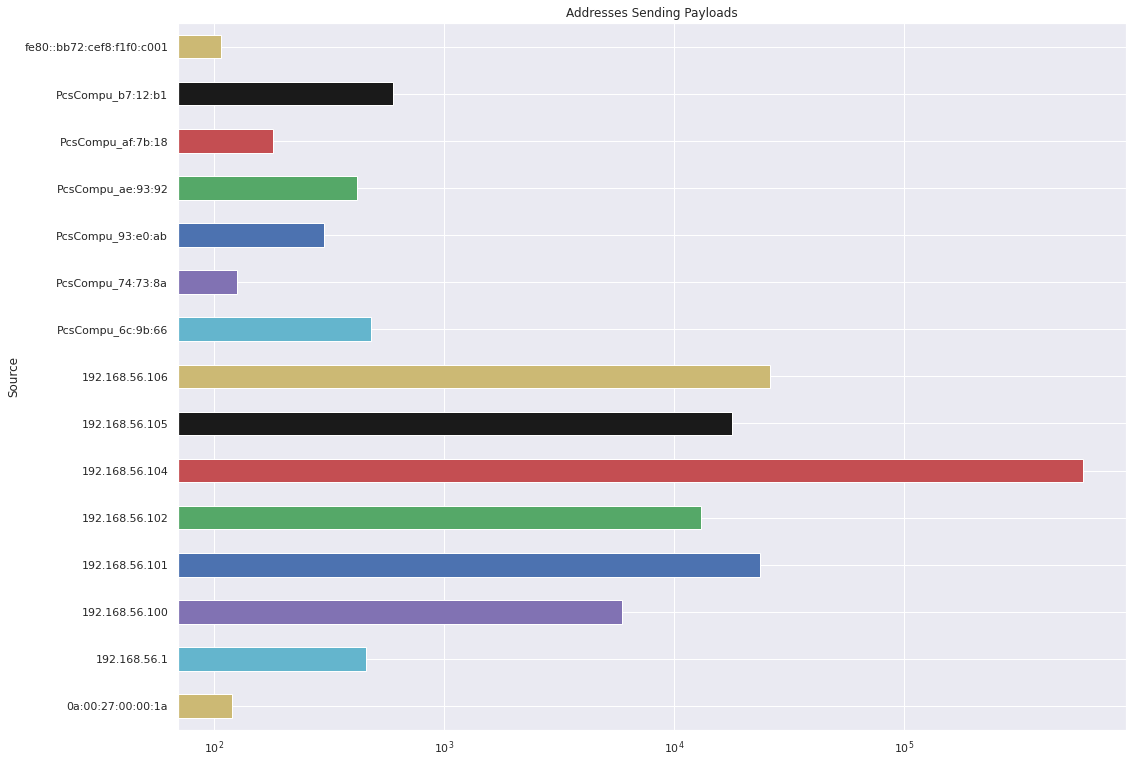

In [8]:
# Group by Source Address and Payload Length Sum
source_addresses = benign_df.groupby('Source')['Length'].sum()
print("Total data transmitted by Source:\n"+str(source_addresses))

print(type(source_addresses))

source_addresses.plot.barh(title="Addresses Sending Payloads",figsize=(17,13), 
                           logx=True, color=["y","c","m", "b", "g", "r", "k"])

### Deep analysis of Destination Stats

In [9]:
# Unique Destination Addresses
print("\nUnique Destination Addresses")
dest_unique_df = benign_df['Destination'].unique()
print(dest_unique_df)
print('\nUnique IPv4 Destination Addresses\n'+str(df_to_num(dest_unique_df)))


Unique Destination Addresses
['192.168.56.100' '192.168.56.104' 'PcsCompu_b7:12:b1' 'PcsCompu_6c:9b:66'
 'Broadcast' 'PcsCompu_74:73:8a' '192.168.56.105' '192.168.56.106'
 'PcsCompu_93:e0:ab' '192.168.56.102' 'PcsCompu_af:7b:18' '192.168.56.255'
 '255.255.255.255' '192.168.56.1' '0a:00:27:00:00:1a' 'PcsCompu_ae:93:92'
 '192.168.56.101' '224.0.0.251' 'ff02::fb']

Unique IPv4 Destination Addresses
0     192.168.56.100
1     192.168.56.104
2     192.168.56.105
3     192.168.56.106
4     192.168.56.102
5     192.168.56.255
6    255.255.255.255
7       192.168.56.1
8     192.168.56.101
9        224.0.0.251
dtype: object


/home/devang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Total data transmitted by Destination:
Destination
0a:00:27:00:00:1a       120
192.168.56.1            208
192.168.56.100         3420
192.168.56.101        21252
192.168.56.102        15334
192.168.56.104        51592
192.168.56.105        77727
192.168.56.106       514588
192.168.56.255          983
224.0.0.251              87
255.255.255.255         458
Broadcast               162
PcsCompu_6c:9b:66       300
PcsCompu_74:73:8a       180
PcsCompu_93:e0:ab       300
PcsCompu_ae:93:92       420
PcsCompu_af:7b:18       180
PcsCompu_b7:12:b1       564
ff02::fb                107
Name: Length, dtype: int64
<class 'pandas.core.series.Series'>


<AxesSubplot:title={'center':'Addresses Receiving Payloads'}, ylabel='Destination'>

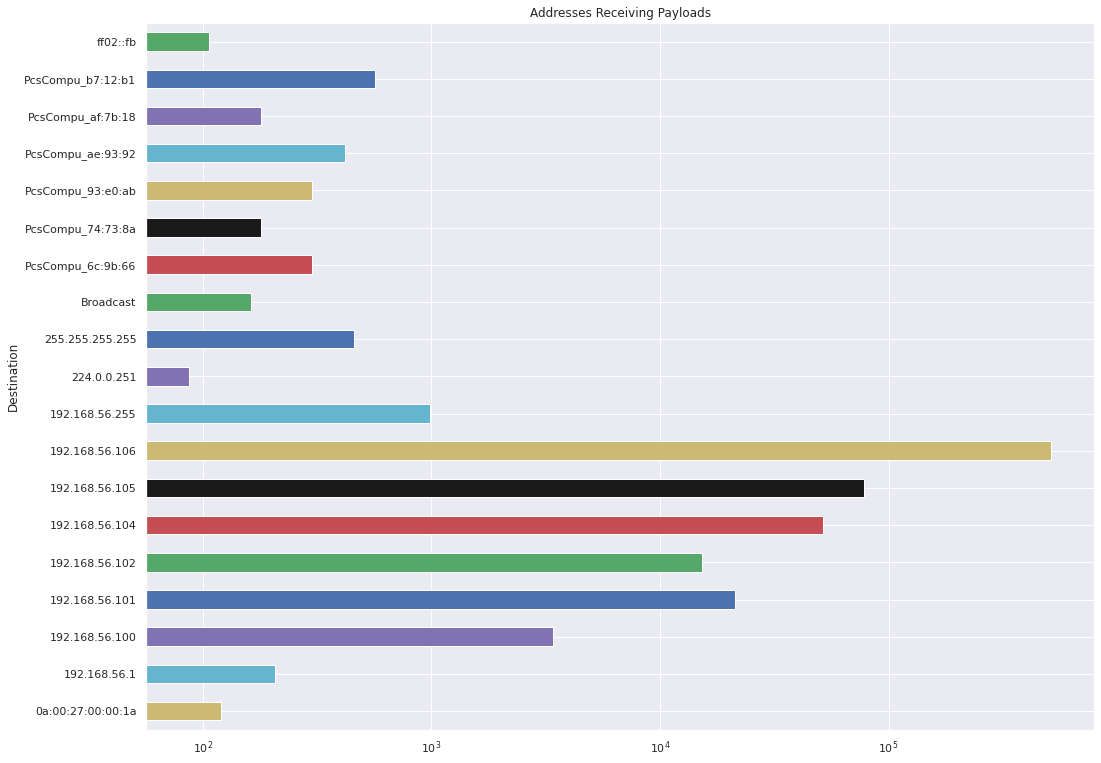

In [10]:
# Group by Source Address and Payload Length Sum
dest_addresses = benign_df.groupby('Destination')['Length'].sum()
print("Total data transmitted by Destination:\n"+str(dest_addresses))

print(type(dest_addresses))

dest_addresses.plot.barh(title="Addresses Receiving Payloads",figsize=(17,13), 
                           logx=True, color=["y","c","m", "b", "g", "r", "k"])

### Deep analysis of Source port

Total data transmitted by Source Port (Top 20):
Source Port
80.0       589955
42720.0     13946
22.0        11983
40650.0      8909
46744.0      8740
445.0        5922
67.0         5900
40634.0      4443
46748.0      3713
40690.0      3683
68.0         3420
48648.0      3096
48644.0      2466
40628.0      2398
56194.0      2233
139.0        1743
40624.0      1507
40692.0      1147
40652.0      1108
40636.0      1079
Name: Length, dtype: int64


<AxesSubplot:title={'center':'Source Ports (Bytes Sent)'}, ylabel='Source Port'>

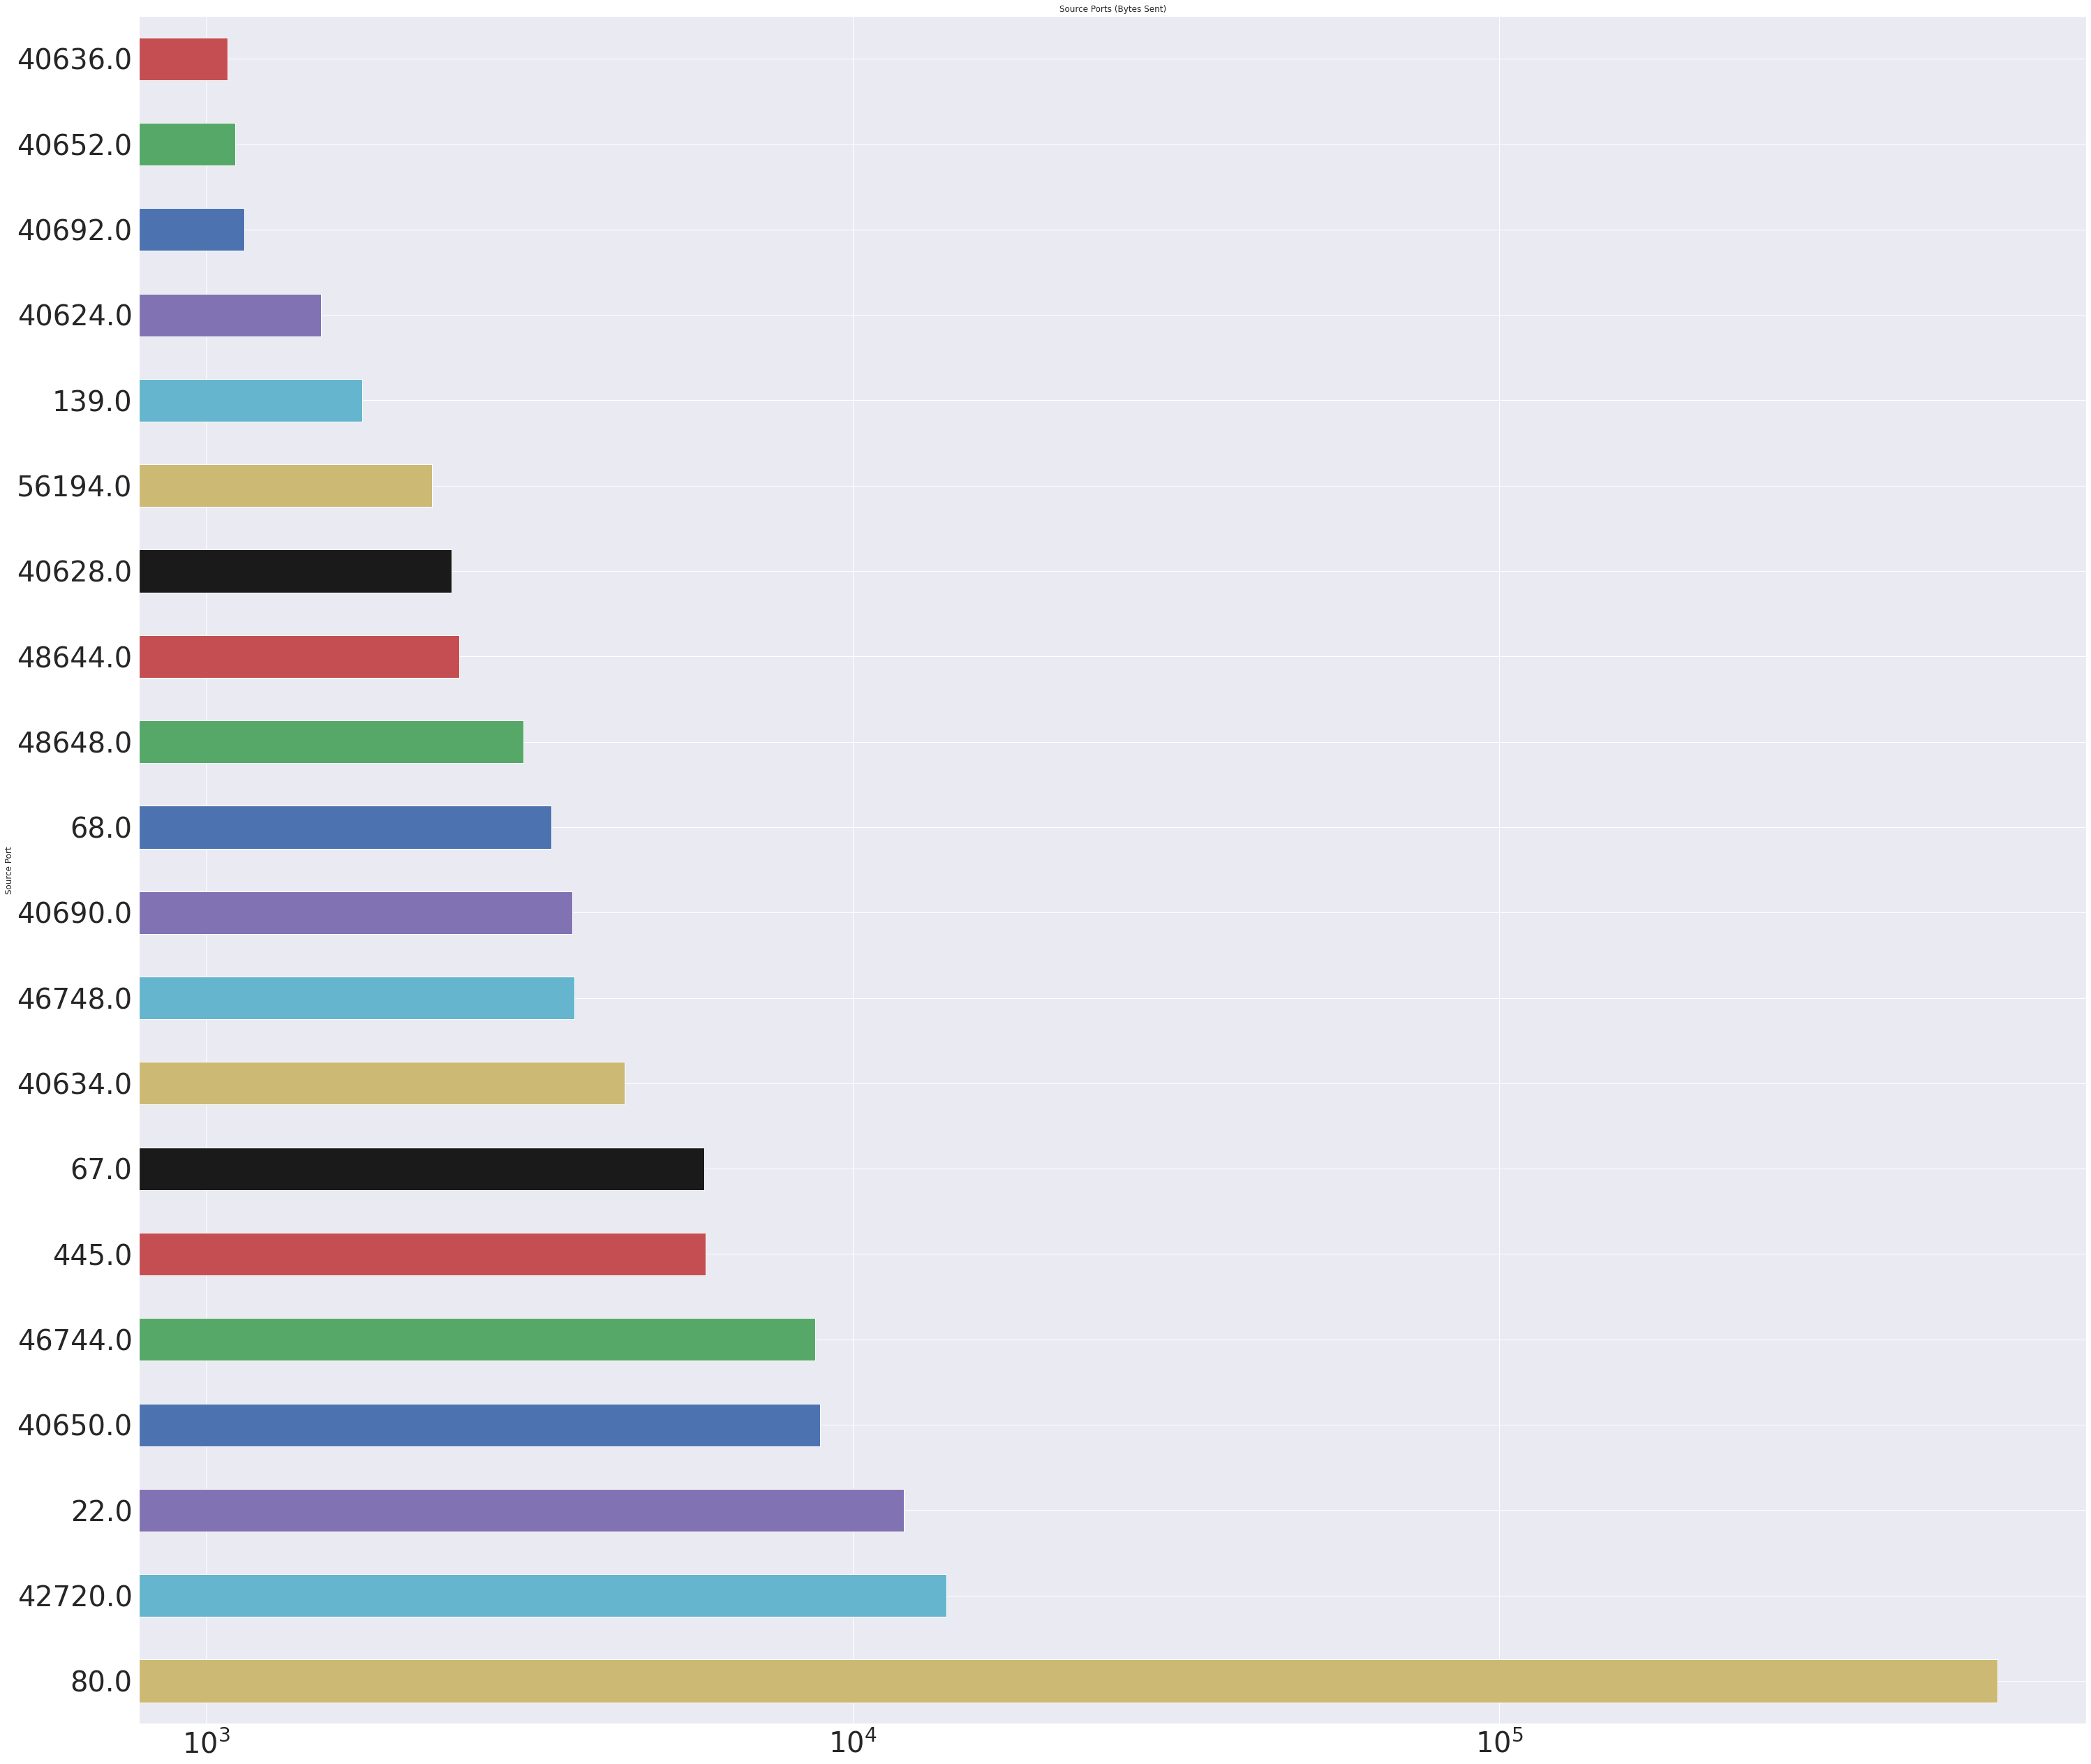

In [11]:
# Group by Source Port and Packet Length Sum
src_pkt_length_df = benign_df[benign_df['Source Port'] != int(0.0)]
src_pkt_length_df = src_pkt_length_df.groupby('Source Port')['Length'].sum().sort_values(ascending=False)
src_pkt_length_df = src_pkt_length_df.head(20)
print("Total data transmitted by Source Port (Top 20):\n"+str(src_pkt_length_df))
src_pkt_length_df.plot.barh(title="Source Ports (Bytes Sent)",figsize=(50,45), 
                           logx=True, color=["y","c","m", "b", "g", "r", "k"], fontsize=40)

Total data transmitted by Destination Port (Top 20):
Dest Port
40634.0    389133
40628.0     61807
80.0        42453
40636.0     24151
40650.0     20796
46744.0     17199
46740.0     14818
46742.0     14752
46738.0     14752
22.0        13946
42720.0     11983
46748.0      6221
40690.0      6096
68.0         5900
445.0        5562
40624.0      5019
46730.0      4623
48648.0      3730
67.0         3420
40626.0      2777
Name: Length, dtype: int64


<AxesSubplot:title={'center':'Destination Ports (Bytes Sent)'}, ylabel='Dest Port'>

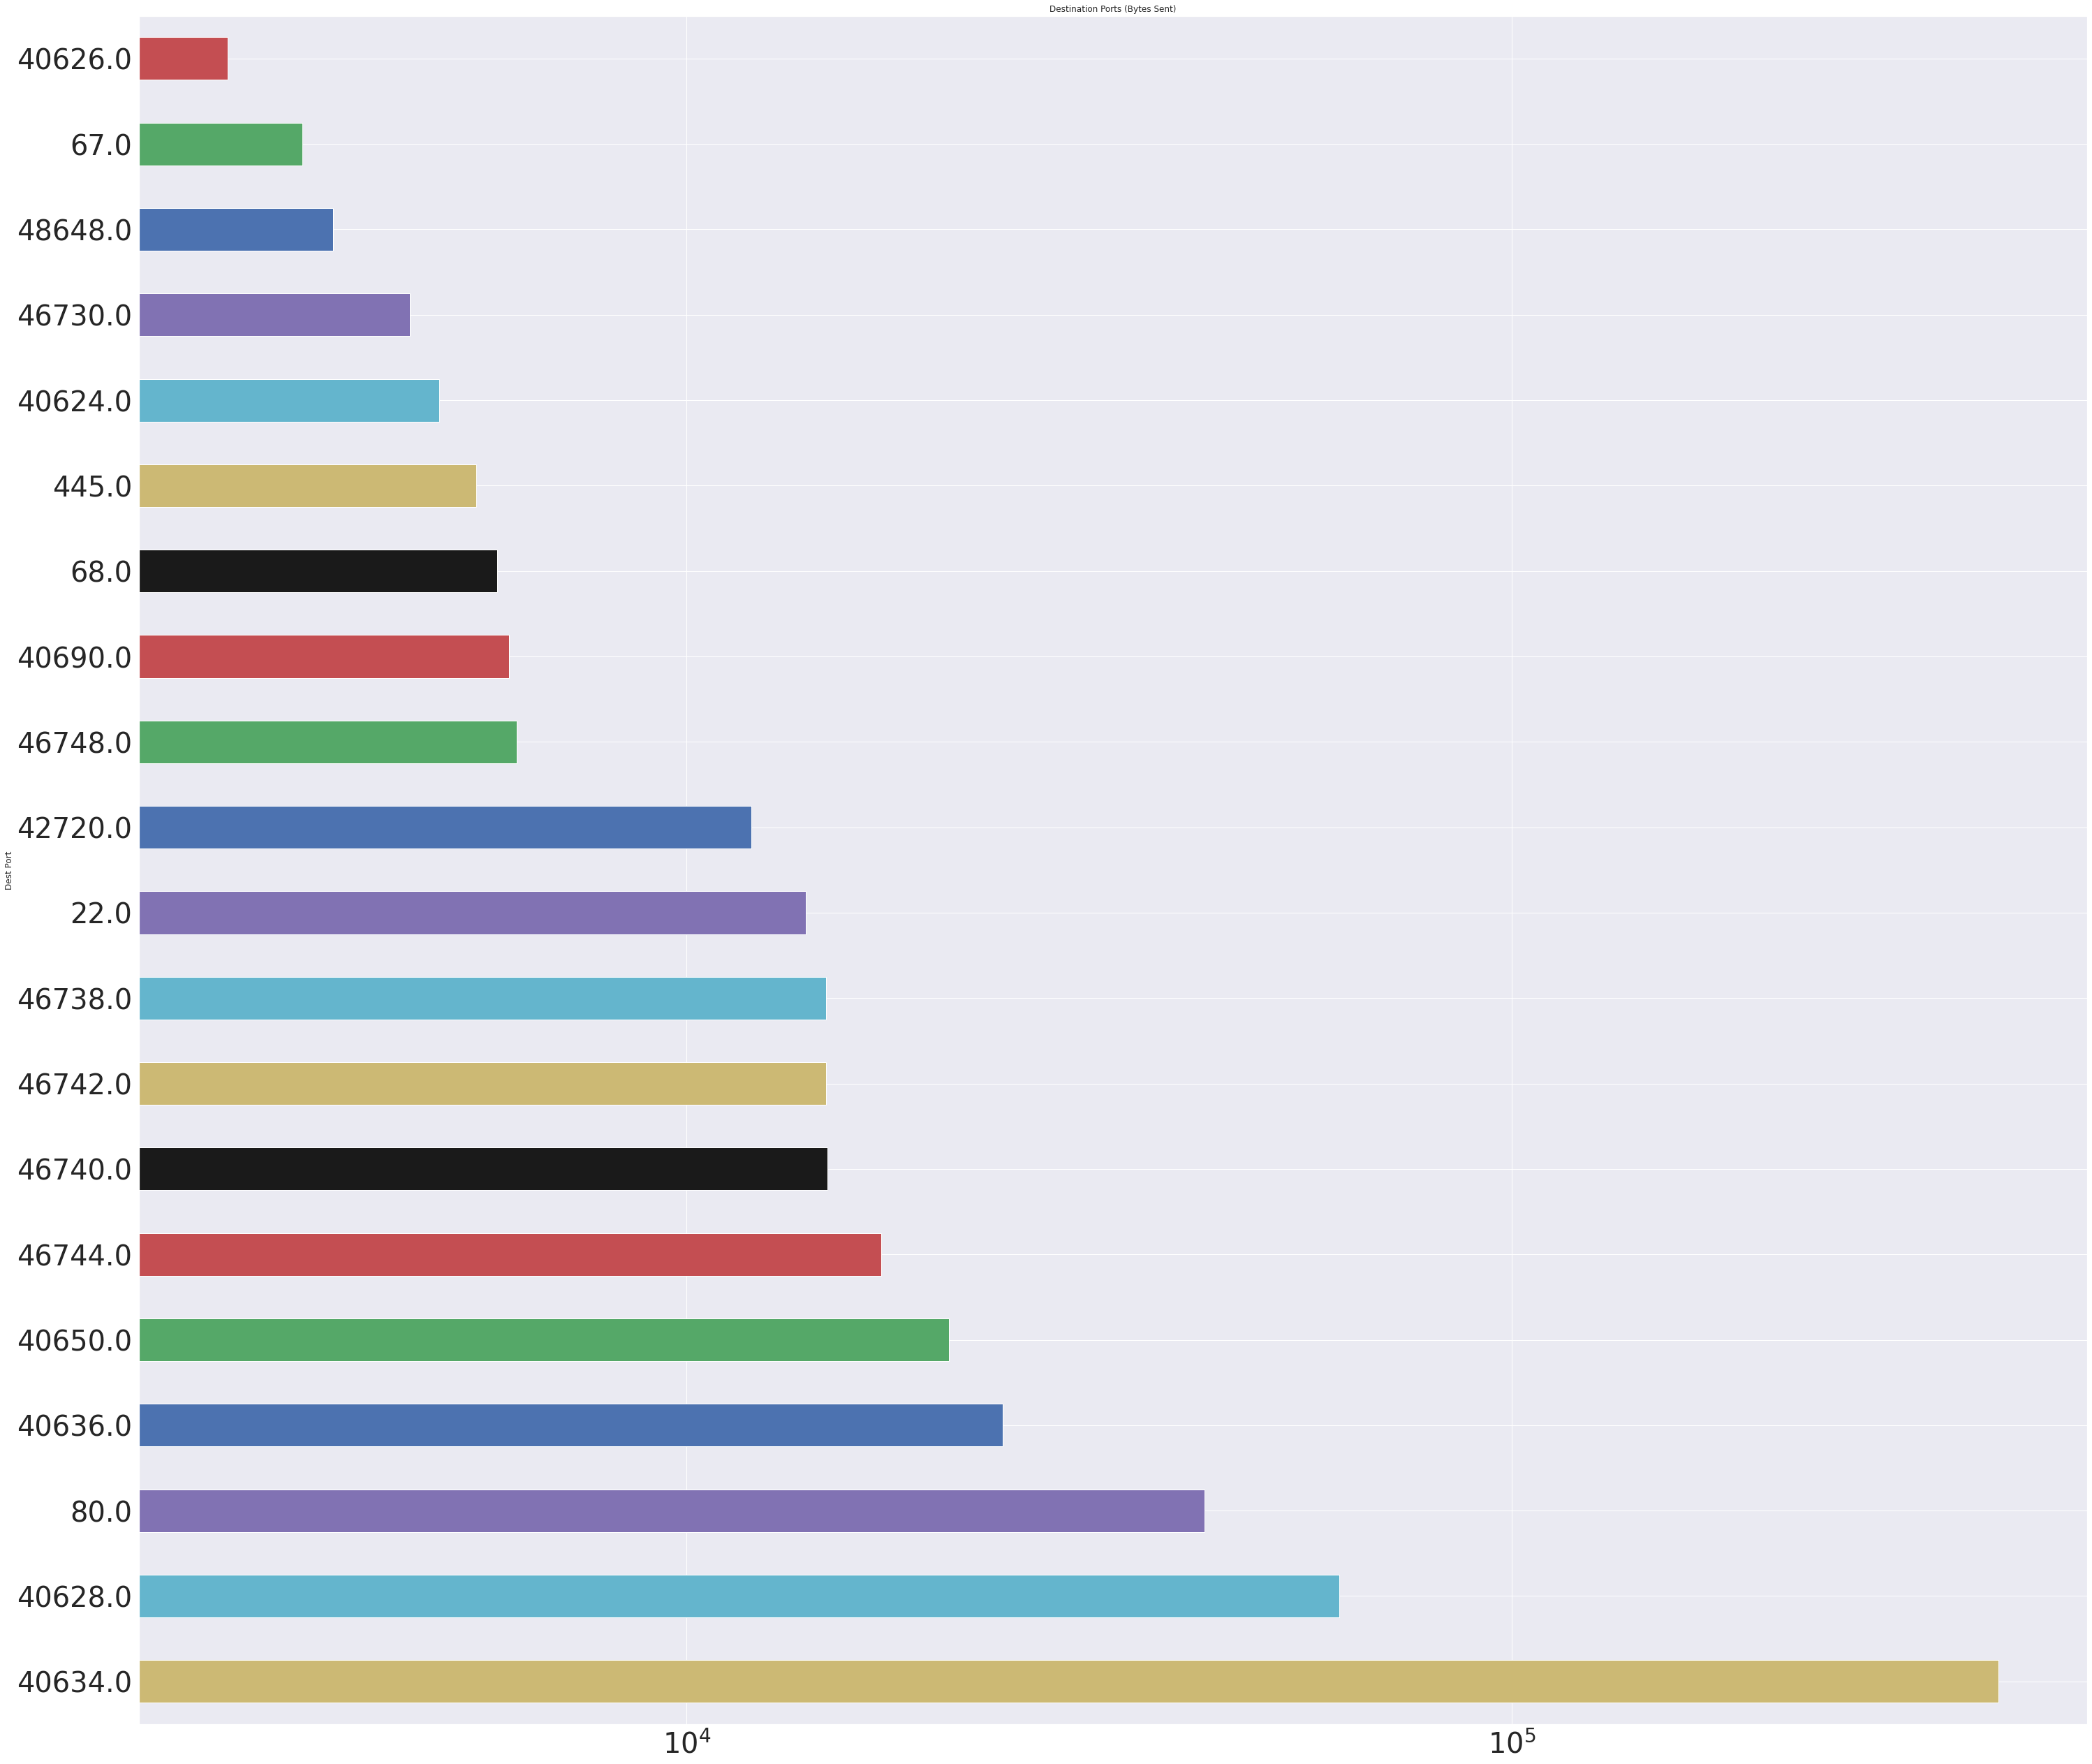

In [12]:
# Group by Destination Port and Packet Length Sum
dest_pkt_length_df = benign_df[benign_df['Dest Port'] != int(0.0)]
dest_pkt_length_df = dest_pkt_length_df.groupby('Dest Port')['Length'].sum().sort_values(ascending=False)
dest_pkt_length_df = dest_pkt_length_df.head(20)
print("Total data transmitted by Destination Port (Top 20):\n"+str(dest_pkt_length_df))
dest_pkt_length_df.plot.barh(title="Destination Ports (Bytes Sent)",figsize=(50,45), 
                           logx=True, color=["y","c","m", "b", "g", "r", "k"], fontsize=40)

             Source  Source Port     Destination  Dest Port  Length
6    192.168.56.105      46730.0  192.168.56.104       80.0      74
8    192.168.56.105      46730.0  192.168.56.104       80.0      66
9    192.168.56.105      46730.0  192.168.56.104       80.0     380
12   192.168.56.105      46730.0  192.168.56.104       80.0      66
13   192.168.56.105      46730.0  192.168.56.104       80.0     361
..              ...          ...             ...        ...     ...
234  192.168.56.105      46748.0  192.168.56.104       80.0      66
235  192.168.56.105      46744.0  192.168.56.104       80.0      66
237  192.168.56.105      46748.0  192.168.56.104       80.0      66
239  192.168.56.105      46744.0  192.168.56.104       80.0      66
660  192.168.56.105         68.0  192.168.56.100       67.0     342

[114 rows x 5 columns]


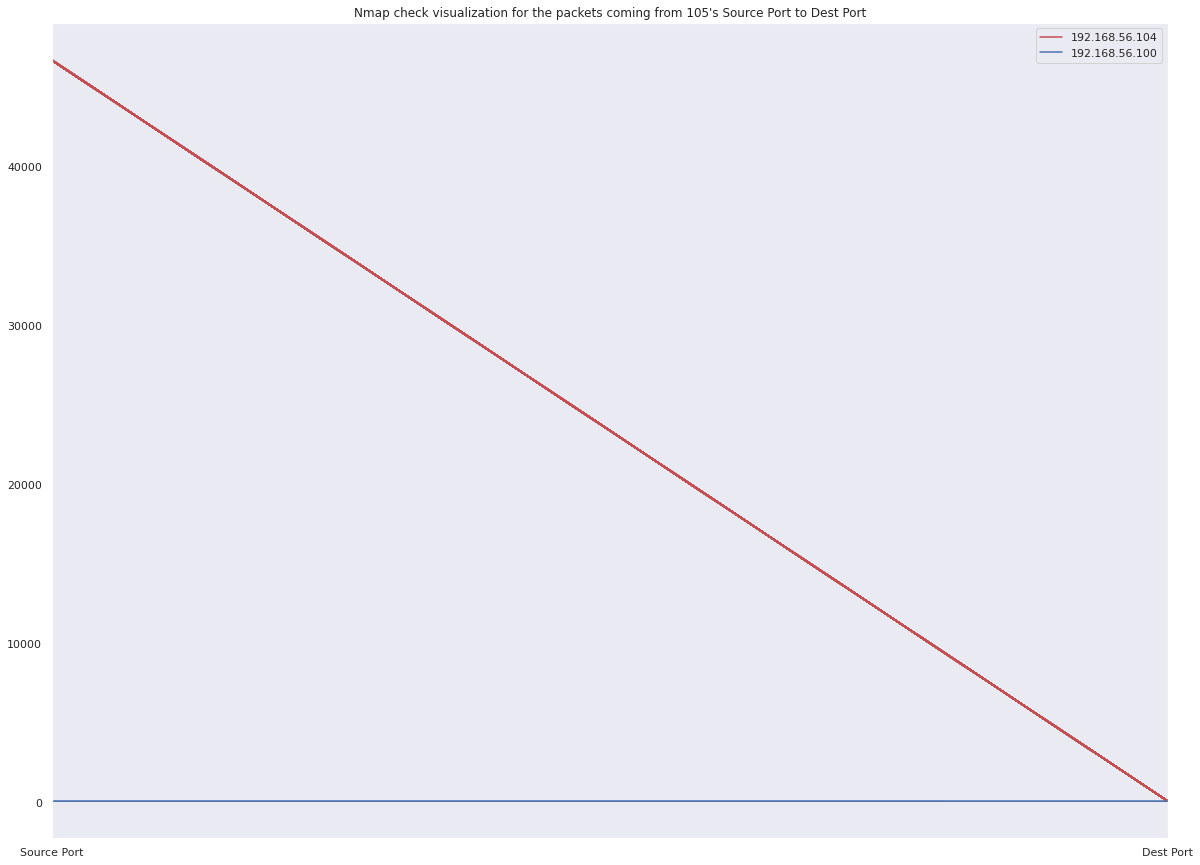

In [16]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

nmap_check_df = benign_df[(benign_df['Source'] == "192.168.56.105")]
print(nmap_check_df[['Source', 'Source Port', 'Destination', 'Dest Port', 'Length']])


figure(figsize=(20,15))
plotting.parallel_coordinates(nmap_check_df, "Destination", cols=['Source Port', 'Dest Port'], 
                              color=('r', 'b', 'y', 'c', 'm', 'g', 'k'))
plt.title('Nmap check visualization for the packets coming from 105\'s Source Port to Dest Port')
plt.show()

In [ ]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20,15))
plotting.parallel_coordinates(benign_df, "Destination", cols=['Source Port', 'Dest Port'], 
                              color=('r', 'b', 'y', 'c', 'm', 'g', 'k'))
plt.title('Nmap Visualization from Source Port to Dest Port')
plt.show()

#### Timeline analysis for 192.168.56.104
##### Note: There wasn't any data transfer between 101/102 and 105

In [ ]:
#groupby("time")['payload'].sum().plot(kind='barh',title="Destination Ports (Bytes Received)",figsize=(8,5))

time_slice_df = benign_df[(benign_df['Source'] == "192.168.56.105") & (benign_df['Destination'] == "192.168.56.104")]
time_slice_df = time_slice_df[["Time", "Length"]]
print(time_slice_df)

start_time = float(1595011927.678)
end_time = float(1595012441.255)

bins = np.arange(start_time, end_time+1, 30)
time_slice_df = time_slice_df.groupby(pd.cut(time_slice_df['Time'], bins=bins)).Length.sum()
print("Data received by 192.168.56.101 every 30 seconds:\n"+str(time_slice_df))
time_slice_df.plot.barh(title="Data received by 192.168.56.104 every 30 seconds",
                        figsize=(20,18), color=["m", "b", "y"], fontsize=16)